<a href="https://colab.research.google.com/github/tej-mahender/python_project_lung_cancer/blob/main/Copy_of_heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Heart Disease

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Dataset


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Heart_Disease_Prediction.csv')

### Checking For Duplicates



In [ ]:
data[data.duplicated()]

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease


In [ ]:
data = data.rename(columns={'Heart Disease': 'heartdisease'})

In [ ]:
data['heartdisease']=data['heartdisease'].map({'Presence':1,'Absence':0})

### Data Analysis

In [ ]:
data.shape

(270, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  heartdisease             270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [ ]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'heartdisease'],
      dtype='object')

In [ ]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,heartdisease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [ ]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,heartdisease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
data.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,heartdisease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


### Pre-Processing

In [ ]:
data.isnull().sum() #checking for total null values

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
heartdisease               0
dtype: int64

In [ ]:
data["Cholesterol"].value_counts()

234    6
269    5
254    5
212    4
243    4
      ..
313    1
564    1
221    1
306    1
192    1
Name: Cholesterol, Length: 144, dtype: int64

In [ ]:
data["heartdisease"].value_counts()

0    150
1    120
Name: heartdisease, dtype: int64

In [ ]:
# See the min, max, mean values
print('The highest cholestrol was of:',data['Cholesterol'].max())
print('The lowest cholestrol was of:',data['Cholesterol'].min())
print('The average cholestrol in the data:',data['Cholesterol'].mean())

The highest cholestrol was of: 564
The lowest cholestrol was of: 126
The average cholestrol in the data: 249.65925925925927


### Data Visualization in form of graphs

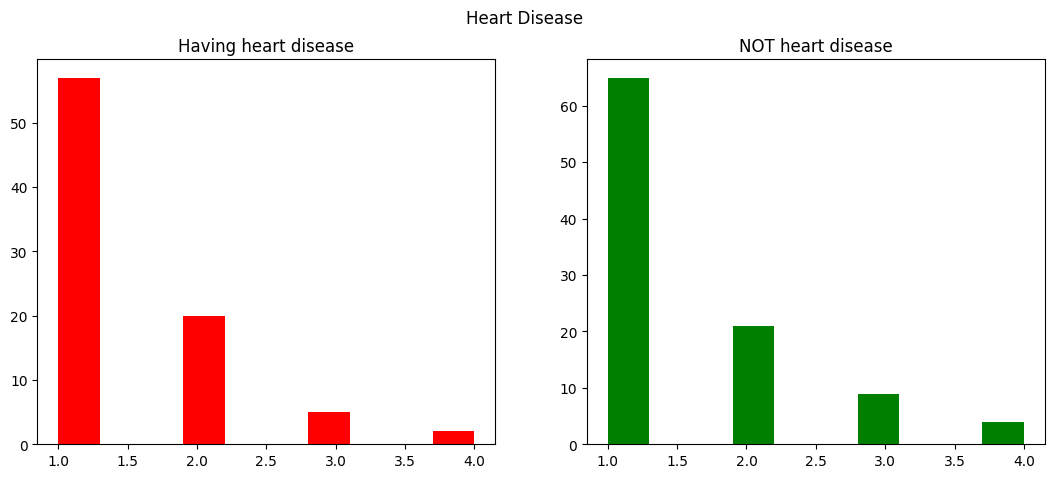

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['heartdisease']==1]['Cholesterol'].value_counts()

ax1.hist(data_len,color='red')
ax1.set_title('Having heart disease')

data_len=data[data['heartdisease']==0]['Cholesterol'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT heart disease')

fig.suptitle('Heart Disease')
plt.show()

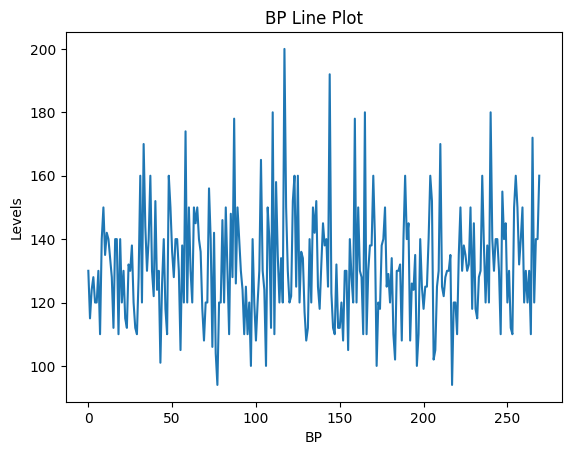

In [ ]:
# visualization
plt.plot(data['BP'])
plt.xlabel("BP")
plt.ylabel("Levels")
plt.title("BP Line Plot")
plt.show()

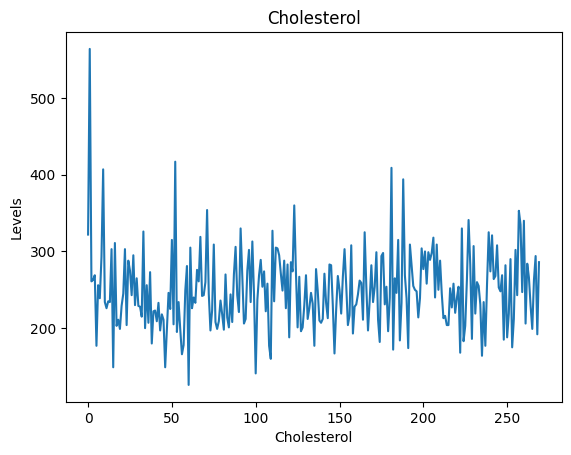

In [ ]:
# visualization
plt.plot(data['Cholesterol'])
plt.xlabel("Cholesterol")
plt.ylabel("Levels")
plt.title("Cholesterol")
plt.show()

### Normalization

In [ ]:
data[1:5]

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,heartdisease
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
from sklearn import preprocessing
import pandas as pd

d = preprocessing.normalize(data.iloc[:,1:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["Age", "BP", "Cholesterol", "Sex"])
scaled_df.head()

,Age,BP,Cholesterol,Sex
0,0.073922,0.073484,0.059688,0.076868
1,0.000000,0.055113,0.052801,0.134639
2,0.073922,0.036742,0.056933,0.062306
3,0.073922,0.073484,0.058769,0.062784
4,0.000000,0.036742,0.055096,0.064216


In [ ]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score, classification_report #for confusion matrix
from sklearn.linear_model import LogisticRegression,LinearRegression #logistic regression

### Split into train and test in the ratio 70:30

In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=42,stratify=data['heartdisease'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]]
Y=data['heartdisease']
len(train_X), len(train_Y), len(test_X), len(test_Y)

(189, 189, 81, 81)

In [ ]:
model = LogisticRegression(C=0.1, penalty='l2')
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))
report = classification_report(test_Y, prediction3)
print("Classification Report:\n", report)

The accuracy of the Logistic Regression is 0.9135802469135802
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        45
           1       0.87      0.94      0.91        36

    accuracy                           0.91        81
   macro avg       0.91      0.92      0.91        81
weighted avg       0.92      0.91      0.91        81



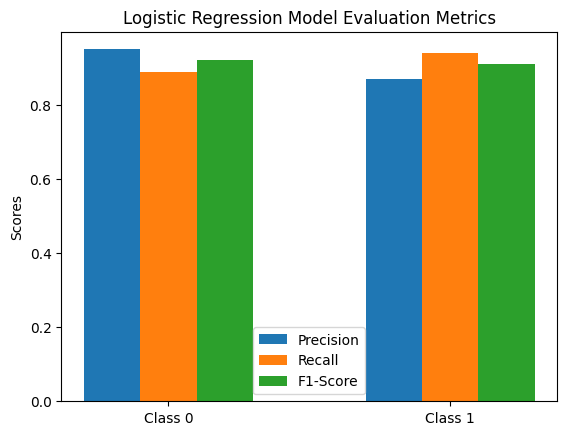

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these values with your actual scores
precision = [0.95, 0.87]
recall = [0.89, 0.94]
f1_score = [0.92, 0.91]

labels = ['Class 0', 'Class 1']

# Plotting the bar chart
width = 0.2
x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Adding labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Logistic Regression Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()

In [ ]:
print(precision)
print(recall)
print(f1_score)

[0.95, 0.87]
[0.89, 0.94]
[0.92, 0.91]


In [ ]:
model = LogisticRegression(C=0.1, penalty='l2')
model.fit(train_X, train_Y)
#accuracy = accuracy_score(test_Y, predictions.round())
predictions = model.predict(test_X)
mse = mean_squared_error(test_Y, predictions)
rmse = mean_squared_error(test_Y, predictions, squared=False)
mae = mean_absolute_error(test_Y, predictions)
r2 = r2_score(test_Y, predictions)
print('The accuracy of Logistic Regression is:', metrics.accuracy_score(predictions,test_Y))
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:',r2)

The accuracy of Logistic Regression is: 0.9135802469135802
Mean Squared Error: 0.08641975308641975
Root Mean Squared Error: 0.2939723678960656
Mean Absolute Error: 0.08641975308641975
R-squared: 0.6500000000000001
